In [75]:
# importing to allow to read files into google colab directly from drive!

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# importing necessary libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import keras
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, LSTM,BatchNormalization,TimeDistributed,Flatten,Bidirectional

In [77]:
# the name of file names to read from txt files

filename = ['L4_abhay_M_38_10.txt','L4_abhilash1_M_23_10.txt','L4_amrish_M_29_10.txt','L4_annu1_F_10_10.txt','L4_anuj1_M_13_10.txt','L4_avinash1_M_27_10.txt','L4_bhuvan1_M_13_10.txt','L4_chachiiiiiiiiiii1_F_35_10.txt','L4_champu_M_21_10.txt','L4_garima1_F_13_10.txt','L4_geetamami1_F_34_10.txt','L4_gordhan_M_45_10.txt','L4_Gunjan1_F_17_10.txt','L4_guzzrAunty1_F_48_10.txt','L4_joney1_M_31_10.txt','L4_kanchan1_F_12_10.txt','L4_kapil_M_21_10.txt','L4_kirti1_F_6_10.txt','L4_kusum1_F_48_10.txt','L4_lalit1_M_12_10.txt','L4_laras1_M_8_10.txt','L4_mahesh1_M_50_10.txt','L4_mannu1_M_13_10.txt','L4_manthan1_M_18_10.txt','L4_mohit1_M_10_10.txt','L4_monika1_F_24_10.txt','L4_moolchnd1_M_47_10.txt','L4_munish_M_42_10.txt','L4_nanaji1_M_63_10.txt','L4_naveen1_M_15_10.txt','L4_neeraj_M_28_10.txt','L4_nirmal_M_49_10.txt','L4_nishu1_M_12_10.txt','L4_omsingh_M_35_10.txt','L4_pawan1_M_23_10.txt','L4_prabhat1_M_25_10.txt','L4_prachi1_F_8_10.txt','L4_praveen1_M_28_10.txt','L4_priya1_F_7_10.txt','L4_pushpa1_F_37_10.txt','L4_radhe1_M_36_10.txt','L4_rajumama1_M_36_10.txt','L4_raj_M_28_10.txt','L4_ranu_M_22_10.txt','L4_rohit1_M_16_10.txt','L4_sachinn_M_38_10.txt','L4_sakshi1_F_19_10.txt','L4_santosh1_F_53_10.txt','L4_shelly_F_17_10.txt','L4_soniya1_F_25_10.txt','L4_sumit1_M_12_10.txt','L4_sunil_M_27_10.txt','L4_sunyana1_F_15_10.txt','L4_sushma1_F_18_10.txt','L4_swati1_F_13_10.txt','L4_tarun1_M_18_10.txt','L4_umesh1_M_20_10.txt','L4_vikas1_M_33_10.txt','L4_vinay1_M_11_10.txt','L4_yogesh_M_28_10.txt']
len(filename)

60

In [81]:
FILE_PATH = '/content/drive/MyDrive/ell319_termpaper/Untitled Folder/'
# theta_age.csv, beta_age.csv, gamma_age.csv and alpha_age.csv
df=pd.read_csv(FILE_PATH+'theta_age.csv',header=None)
conditions = [
    (df[15] <= 10),
    (df[15] > 10) & (df[15] <= 15),
    (df[15] > 15) & (df[15] <= 23),
    (df[15] > 23) & (df[15] <= 29),
    (df[15] > 29) & (df[15] <= 38),
    (df[15] <= 90)]
choices = [1, 2, 3, 4, 5, 6]
df[16] = np.select(conditions, choices, default=0)
df = df.drop(15,axis=1)
print(df.shape)
print(df)

(632697, 16)
                          0       1         2        3        4        5   \
0        L1_abhay_M_38_1.txt  2.9420 -29.96100 -0.68681  0.82153  0.86877   
1        L1_abhay_M_38_1.txt  2.9450 -32.86300 -0.74484  0.81187  0.83548   
2        L1_abhay_M_38_1.txt  2.9471 -35.74700 -0.80226  0.80232  0.80218   
3        L1_abhay_M_38_1.txt  2.9483 -38.61200 -0.85904  0.79290  0.76888   
4        L1_abhay_M_38_1.txt  2.9485 -41.45600 -0.91516  0.78361  0.73557   
...                      ...     ...       ...      ...      ...      ...   
632692  L4_yogesh_M_28_9.txt -4.1062  -0.61699  5.62520 -2.40570 -0.18109   
632693  L4_yogesh_M_28_9.txt -3.8848  -0.62440  5.46230 -2.36910 -0.16975   
632694  L4_yogesh_M_28_9.txt -3.6614  -0.63148  5.29760 -2.33170 -0.15834   
632695  L4_yogesh_M_28_9.txt -3.4362  -0.63807  5.13110 -2.29360 -0.14687   
632696  L4_yogesh_M_28_9.txt -3.2091  -0.64403  4.96310 -2.25490 -0.13535   

            6        7         8        9        10      11   

In [82]:
data=np.array(df)
data = data[:80380,:]

In [83]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
data[:,1:15] = scl.fit_transform(data[:,1:15])

In [84]:

print(data.shape)
print(data)

(80380, 16)
[['L1_abhay_M_38_1.txt' 0.03922215632590721 -0.21473843564963072 ...
  -0.2384719587777121 -0.0028727494025529527 5]
 ['L1_abhay_M_38_1.txt' 0.03926224507033802 -0.23559512555705153 ...
  -0.2381775666774896 -0.0026275396225387978 5]
 ['L1_abhay_M_38_1.txt' 0.03929030719143959 -0.2563224493658047 ...
  -0.23781137162599333 -0.0023816962255220225 5]
 ...
 ['L1_nirmal_M_49_10.txt' -0.19466894159827935 -0.06732648491837022 ...
  -0.066216678671924 -0.7684222084424778 6]
 ['L1_nirmal_M_49_10.txt' -0.19937268761149501 -0.06910239397285804 ...
  -0.06817689924169808 -0.765335588472569 6]
 ['L1_nirmal_M_49_10.txt' -0.20403634488027986 -0.07086249161528649 ...
  -0.07011845104414097 -0.7621222451021362 6]]


In [85]:
# pick a large window size of 25 cycles
sequence_length = 50

# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    
    data_matrix = id_df[:,seq_cols]
    
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [86]:
sequence_cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

seq_gen = (list(gen_sequence(data[data[0:,0]==id], sequence_length, sequence_cols)) 
          for id in np.unique(data[0:,0]))

seq_array = np.concatenate(list(seq_gen))
print(seq_array.shape)
seq_array

(64780, 50, 15)


array([[[-1.1607542307216863, -1.4800035636687658, -0.3033433774557399,
         ..., -2.069655444817688, -1.9274977913362599, 3],
        [-1.200228281071229, -1.5479207654692921, -0.31967958468195345,
         ..., -2.119989313660605, -1.9714889146610584, 3],
        [-1.2395419764430484, -1.615622357105372, -0.33595391233534044,
         ..., -2.169964167747153, -2.0150274544125564, 3],
        ...,
        [-2.3793585210147987, -3.682317653376198, -0.80682210178961,
         ..., -3.4879791413285806, -3.0924479090114816, 3],
        [-2.381229329088237, -3.691301410228119, -0.8076442161143058,
         ..., -3.484963417375082, -3.086564322558576, 3],
        [-2.3817638456806476, -3.698344675600025, -0.8079712938563892,
         ..., -3.4802962255422867, -3.0790514352417895, 3]],

       [[-1.200228281071229, -1.5479207654692921, -0.31967958468195345,
         ..., -2.119989313660605, -1.9714889146610584, 3],
        [-1.2395419764430484, -1.615622357105372, -0.33595391233534044,
 

In [87]:
from sklearn.utils import shuffle
seq_array = shuffle(seq_array)

In [88]:
train_final=seq_array[0:60000,:,0:14]
test_final=seq_array[60000:,:,0:14]
from sklearn import preprocessing
train_label=seq_array[0:60000,0,14]
test_label=seq_array[60000:,0,14]
train_label=train_label.reshape((train_label.shape[0],1))
train_label=train_label.astype('int')
test_label=test_label.astype('int')
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)

(60000, 50, 14)
(60000, 1)
(4780, 50, 14)
(4780,)


In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_label)
train_label = encoder.transform(train_label)
test_label = encoder.transform(test_label)
# convert integers to dummy variables (i.e. one hot encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
from keras.utils import np_utils

train_label = np_utils.to_categorical(train_label)
# test_label = np_utils.to_categorical(test_label)

In [91]:
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)
print(train_label)
print(np.unique(test_label))

(60000, 50, 14)
(60000, 6)
(4780, 50, 14)
(4780,)
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[0 1 2 3 4 5]


In [92]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [93]:
# creating our model:

nb_features = train_final.shape[2]
nb_out = train_label.shape[1]

model = Sequential()

model.add(Bidirectional(LSTM( units=256,
         return_sequences=True),
         input_shape=(sequence_length, nb_features),
        ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(
         units=128,
         return_sequences=True))

model.add(BatchNormalization())
model.add(LSTM(
          units=64,
          return_sequences=False))

model.add(BatchNormalization())
model.add(Dense(units=32))
model.add(Dense(units=6, activation='softmax'))
tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 50, 512)          555008    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 50, 512)           0         
                                                                 
 batch_normalization_12 (Bat  (None, 50, 512)          2048      
 chNormalization)                                                
                                                                 
 lstm_13 (LSTM)              (None, 50, 128)           328192    
                                                                 
 batch_normalization_13 (Bat  (None, 50, 128)          512       
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [94]:
# fitting the model with training data

train_final = np.asarray(train_final).astype(np.float32)
test_final = np.asarray(test_final).astype(np.float32)
model.fit(train_final,train_label,validation_split=0.2,epochs=1, batch_size=32,verbose=1)

1500/1500 [==============================] - 146s 93ms/step - loss: 1.0270 - accuracy: 0.6088 - val_loss: 0.5634 - val_accuracy: 0.7942


In [95]:
# printing confusion matrix and calculating accuracy of our model

test_final = np.asarray(test_final).astype(np.float32)
y_pred_test = np.argmax(model.predict(test_final),axis=1)

y_true_test = test_label

cm_test = confusion_matrix(y_true_test, y_pred_test)
print(cm_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true_test, y_pred_test)))
print('Micro Precision: {:.2f}'.format(precision_score(y_true_test, y_pred_test, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true_test, y_pred_test, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true_test, y_pred_test, average='micro')))

[[522  17   9  15   1  18]
 [ 18 785  50 106  24  99]
 [  9  23 606  91   3  67]
 [  0   7   0 529   4  29]
 [  1  27  43  88 445  43]
 [  5  20  23 101  21 931]]

Accuracy: 0.80

Micro Precision: 0.80
Micro Recall: 0.80
Micro F1-score: 0.80



In [96]:
# defining function to plot confusion matrix plot as shown below
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('confusion_matrix_gender_alpha.png',bbox_inches='tight')

Confusion matrix, without normalization
[[522  17   9  15   1  18]
 [ 18 785  50 106  24  99]
 [  9  23 606  91   3  67]
 [  0   7   0 529   4  29]
 [  1  27  43  88 445  43]
 [  5  20  23 101  21 931]]


<Figure size 504x504 with 0 Axes>

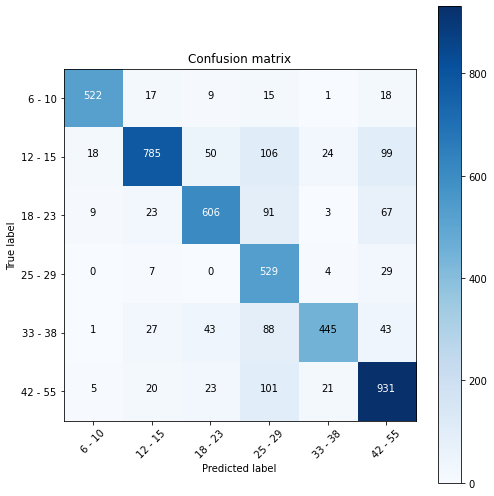

In [97]:
# Plot non-normalized confusion matrix
class_names=['6 - 10','12 - 15','18 - 23','25 - 29','33 - 38','42 - 55']
plt.figure()
plt.rcParams["figure.figsize"] = (7,7)
plot_confusion_matrix(cm_test, classes=class_names,
                      title='Confusion matrix')
plt.show()